## Tarefa 07 - Projeto Integrado por Computador

#### Tema: modelagem de um sistema de refrigeração utilizando curvas de eficiência isentrópica e volumétrica de um compressor real

---

#### Aluno: Abner Vieira Pereira

In [319]:
import CoolProp.CoolProp as CP
import numpy as np
from IPython.display import Math
import matplotlib.pyplot as plt

In [320]:
# Declarando variáveis

fluido = 'R134a'
T_sup = 5           # Temperatura de superaquecimento
T_sub = 4           # Temperatura de subaquecimento
P1 = 140e3          # Pressão na entrada do compressor em MPa
P2 = 800e3          # Pressão na saída do compressor em MPa
N = 2900 / 60       # Rotação do compressor em Hz
V = 20.4e-6         # Volume deslocado no compressor


### Ponto 1: Entrada do compressor

In [321]:
T_evap = CP.PropsSI('T', 'P', P1, 'Q', 1, fluido) - 273.15  
T1 = T_evap + T_sup  
h1 = CP.PropsSI('H', 'T', T1 + 273.15, 'P', P1, fluido)  
h1_C = h1/1000
s1 = CP.PropsSI('S', 'T', T1 + 273.15, 'P', P1, fluido) 
rho1 = CP.PropsSI('D', 'P', P1, 'T', T1 + 273.15, fluido)  

display(Math(r'T_1 = %.3f \, °C' %T1))
display(Math(r' h_1 = %.3f \, kJ/kg' %h1_C))
display(Math(r' s_1 = %.3f \, J/kg°C' %s1))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ponto 2: Saída do compressor

In [322]:
s_2s = s1  # Entropia na saída ideal (isentrópica)
h_2s = CP.PropsSI('H', 'S', s_2s, 'P', P2, fluido)  # Entalpia isentrópica em J/kg
r_p = P2 / P1  # Razão de pressões
eta_isen = 0.282 + 0.077 * r_p - 0.006 * r_p**2  # Eficiência isentrópica
h2 = (h_2s - h1) / eta_isen + h1  # Entalpia real em J/kg
h2_C = h2/1000
T2 = CP.PropsSI('T', 'H', h2, 'P', P2, fluido) - 273.15  # Temperatura real em °C

display(Math(r' r_p = %.3f \, ' %r_p))
display(Math(r' \eta_{isen} = %.3f \,' %eta_isen))
display(Math(r' h_2 = %.3f \, kJ/kg' %h2_C))
display(Math(r' T2 = %.3f \, °C' %T2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Ponto 3: Saída do condensador

In [323]:
T_cond = CP.PropsSI('T', 'P', P2, 'Q', 0, fluido) - 273.15
T3 = T_cond - T_sub
display(Math(r'T_3 = %.3f \, °C' %T3))

<IPython.core.display.Math object>

In [324]:
h3 = CP.PropsSI('H', 'T', T3 + 273.15, 'P', P2, fluido)
h3_C = h3 / 1000
display(Math(r'h_3 = %.3f \, kJ/kg ' %h3_C))

<IPython.core.display.Math object>

In [325]:
s3 = CP.PropsSI('S','T', T3 + 273.15, 'P', P2, fluido)
display(Math(r' s_3 = %.3f \, J/kg°C' %s3))


<IPython.core.display.Math object>

### Ponto 4: Entrada no evaporador

In [326]:
P4 = P1  # Pressão no evaporador igual à pressão na entrada do compressor
h4 = h3  # Entalpia constante no processo de expansão

In [327]:
T4 = CP.PropsSI('T','H', h4,'P',P4, fluido) - 273.15 
display(Math(r'T_4 = %.3f \, °C' %T4))

<IPython.core.display.Math object>

In [328]:
s4 = CP.PropsSI('S','H',h4,'P', P4, fluido)
display(Math(r' s_4 = %.3f \, J/kg°C' %s4))


<IPython.core.display.Math object>

In [329]:
# Eficiência volumétrica
eta_v = 1.037 - 0.152 * r_p + 0.024 * r_p**2 - 0.001 * r_p**3
display(Math(r'\eta_v = %.3f \, '%eta_v))

<IPython.core.display.Math object>

In [330]:
# Vazão volumétrica teórica
V_dot_teor = N * V  # Vazão volumétrica teórica em m³/s
V_dot_real = V_dot_teor * eta_v  # Vazão volumétrica real em m³/s

display(Math(r'\dot{V}_{teor} = %.7f m^3/s' %V_dot_teor))
display(Math(r'\dot{V}_{real} = %.7f m^3/s' %V_dot_real))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [331]:
m_dot_ref = V_dot_real * rho1
display(Math(r'\dot{m}_{ref} = %.4f m^3/s' %m_dot_ref))

<IPython.core.display.Math object>

In [338]:
W_dot_comp_real = (m_dot_ref * (h2 - h1))/1000
display(Math(r'\dot{W}_{comp} = %.4f kW' %W_dot_comp_real))

<IPython.core.display.Math object>

In [333]:
Q_dot_evap = (m_dot_ref * (h1 - h4))/1000
display(Math(r'\dot{Q}_{evap} = %.4f kW' %Q_dot_evap))

<IPython.core.display.Math object>

In [334]:
Q_dot_cond = (m_dot_ref * (h2 - h3))/1000
display(Math(r'\dot{Q}_{cond} = %.4f kW' %Q_dot_cond))

<IPython.core.display.Math object>

In [335]:
COP = Q_dot_evap / W_dot_comp_real
display(Math(r'COP= %.3f' %COP))

<IPython.core.display.Math object>

## Gráfico P-h

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15200\1863263052.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([h1_C,h2_C,h3_C,h3_C,h1_C],


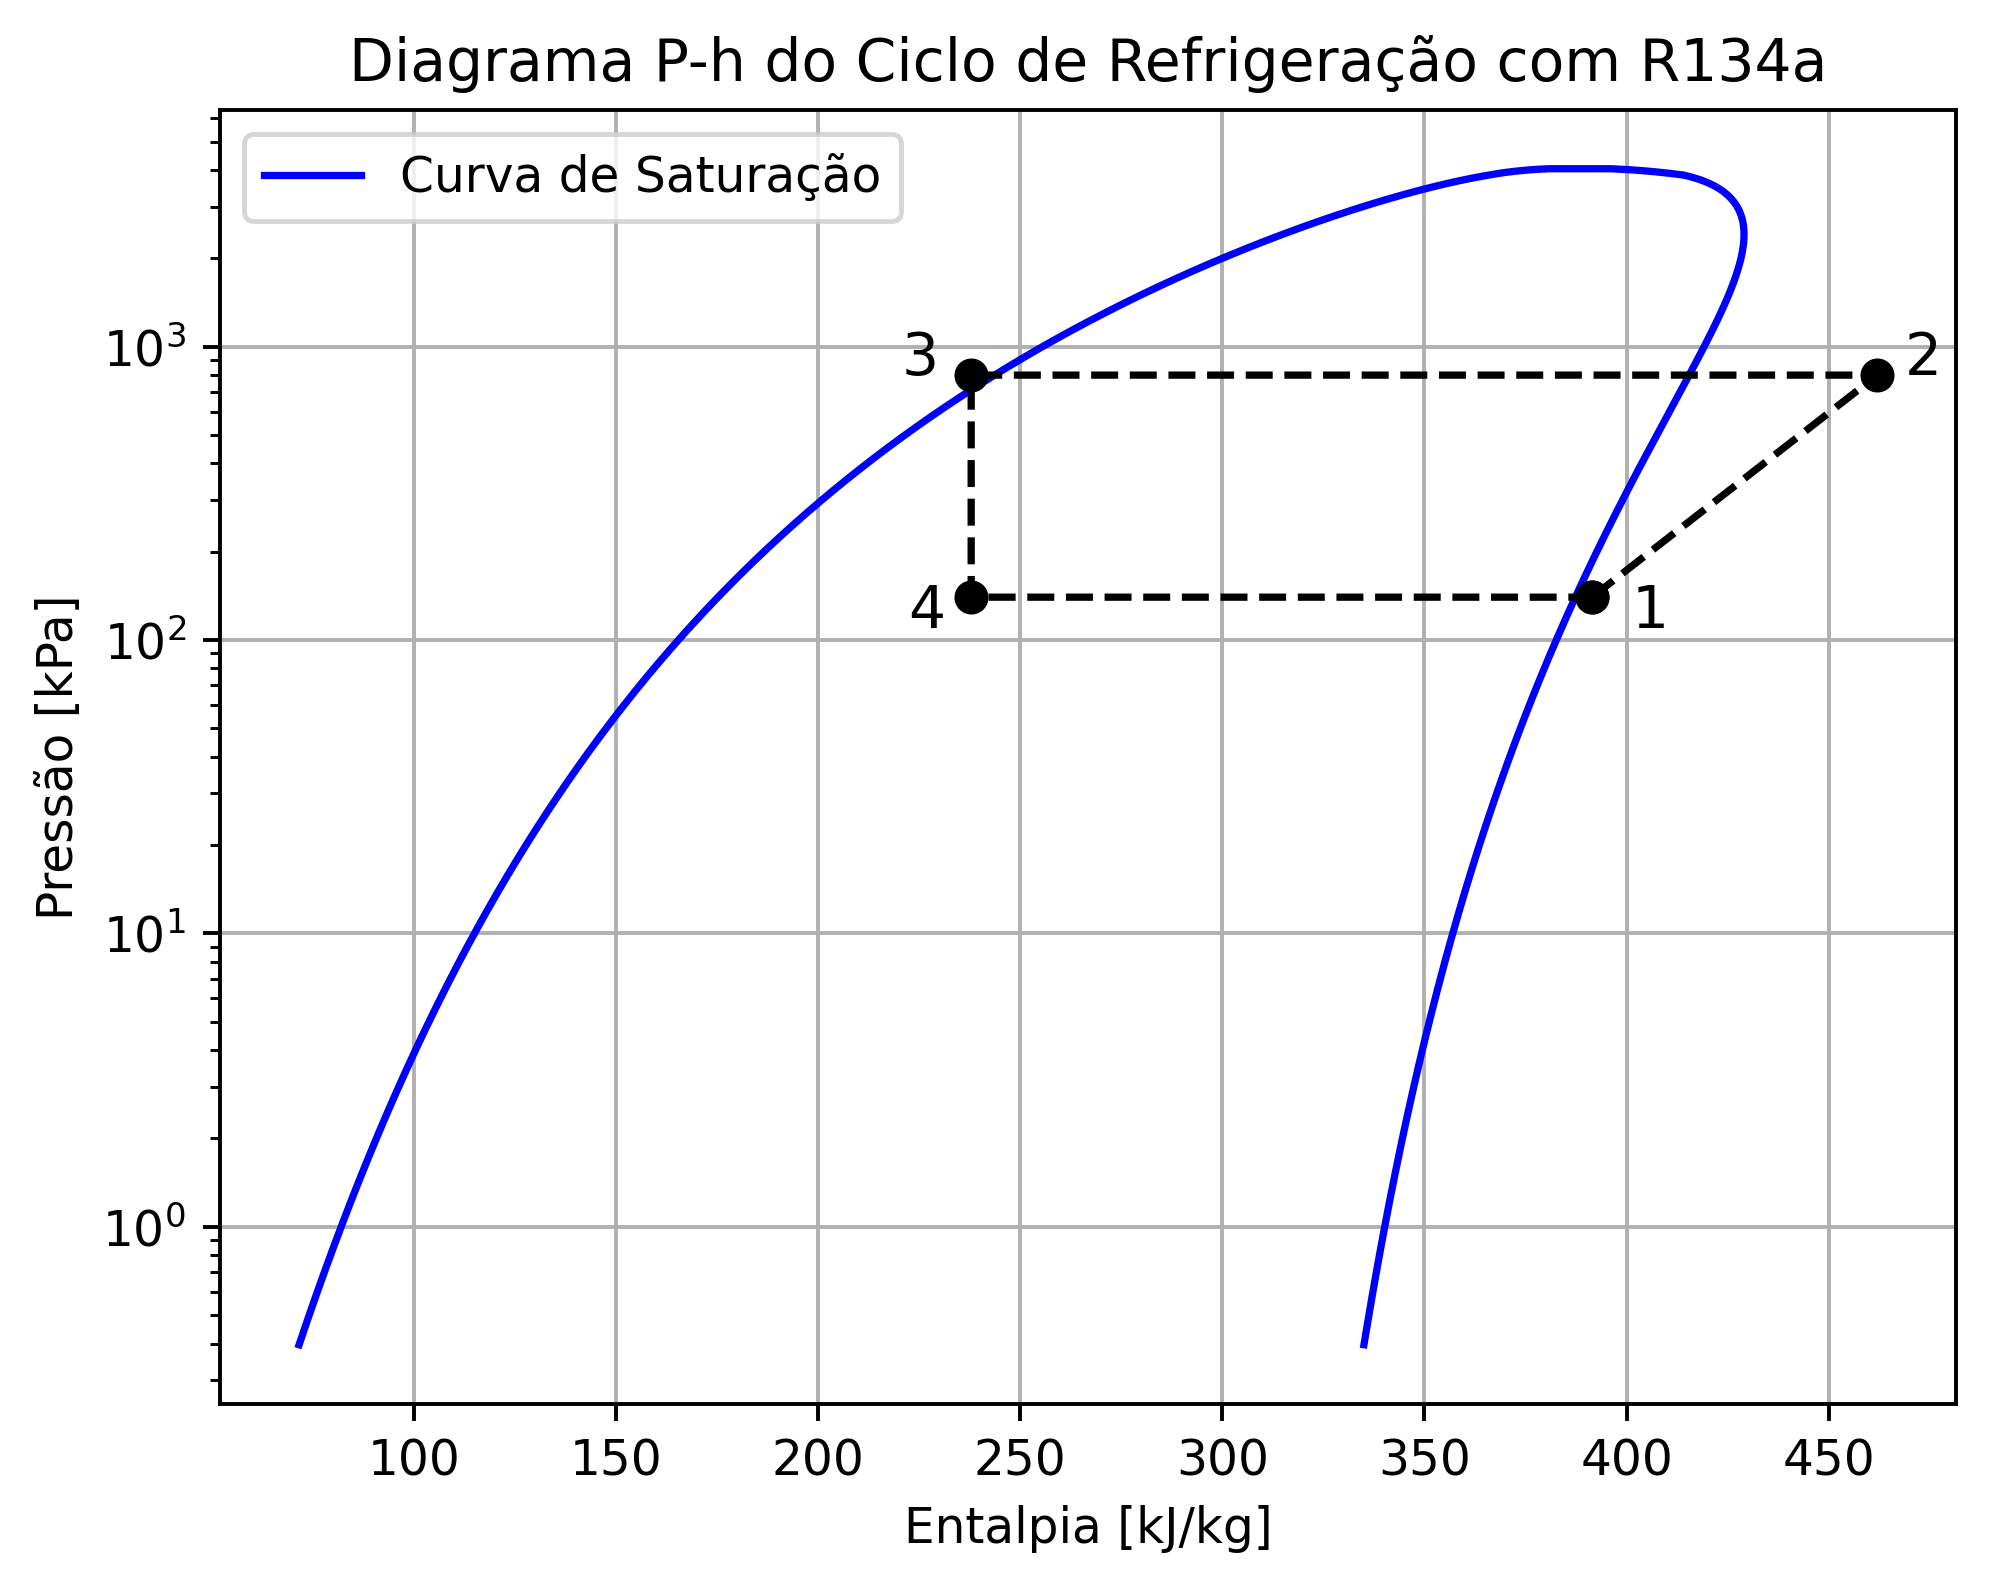

In [336]:
# Definindo os limites de temperatura, incluindo a temperatura crítica
T_min = 170
T_max = 374

# Criando os vetores de temperatura
T_values = np.linspace(T_min, T_max, 1000)  

# Calculando as entalpias de saturação (kJ/kg)
h_liq = [CP.PropsSI('H', 'T', T, 'Q', 0, 'R134a') / 1000 for T in T_values]  # Saturação Líquido
h_vap = [CP.PropsSI('H', 'T', T, 'Q', 1, 'R134a') / 1000 for T in T_values]  # Saturação Vapor

# Calculando as pressões de saturação 
P_values = [CP.PropsSI('P', 'T', T, 'Q', 0, 'R134a') / 1e3 for T in T_values]  

# Criando um vetor de entalpia unificado
h_values = np.concatenate((h_liq, h_vap[::-1]))  # Concatena valores de líquido e vapor
P_values_combined = np.concatenate((P_values, P_values[::-1]))  # Concatena pressão

# Fazendo a plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(h_values, P_values_combined, label='Curva de Saturação', color='blue')

plt.plot([h1_C,h2_C,h3_C,h3_C,h1_C],
         [P1/1e3, P2/1e3, P2/1e3, P4/1e3, P1/1e3],
         'k--',marker='o',color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(h1_C + 19, P1 / 1e3 - 30, '1', fontsize=12, ha='right', color='black')
plt.text(h2_C + 16, P2 / 1e3, '2', fontsize=12, ha='right', color='black')
plt.text(h3_C - 8, P2 / 1e3, '3', fontsize=12, ha='right', color='black')
plt.text(h1_C - 160, P4 / 1e3 - 30, '4', fontsize=12, ha='right', color='black')

# Configurações do gráfico
plt.title('Diagrama P-h do Ciclo de Refrigeração com R134a')
plt.xlabel('Entalpia [kJ/kg]')
plt.ylabel('Pressão [kPa]')
plt.yscale('log')  # Escala logarítmica para a pressão
plt.grid(True)
plt.legend()
plt.show()


## Gráfico T-s

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15200\1631204133.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([s1/1000, s1/1000, s3/1000, s4/1000, s1/1000],


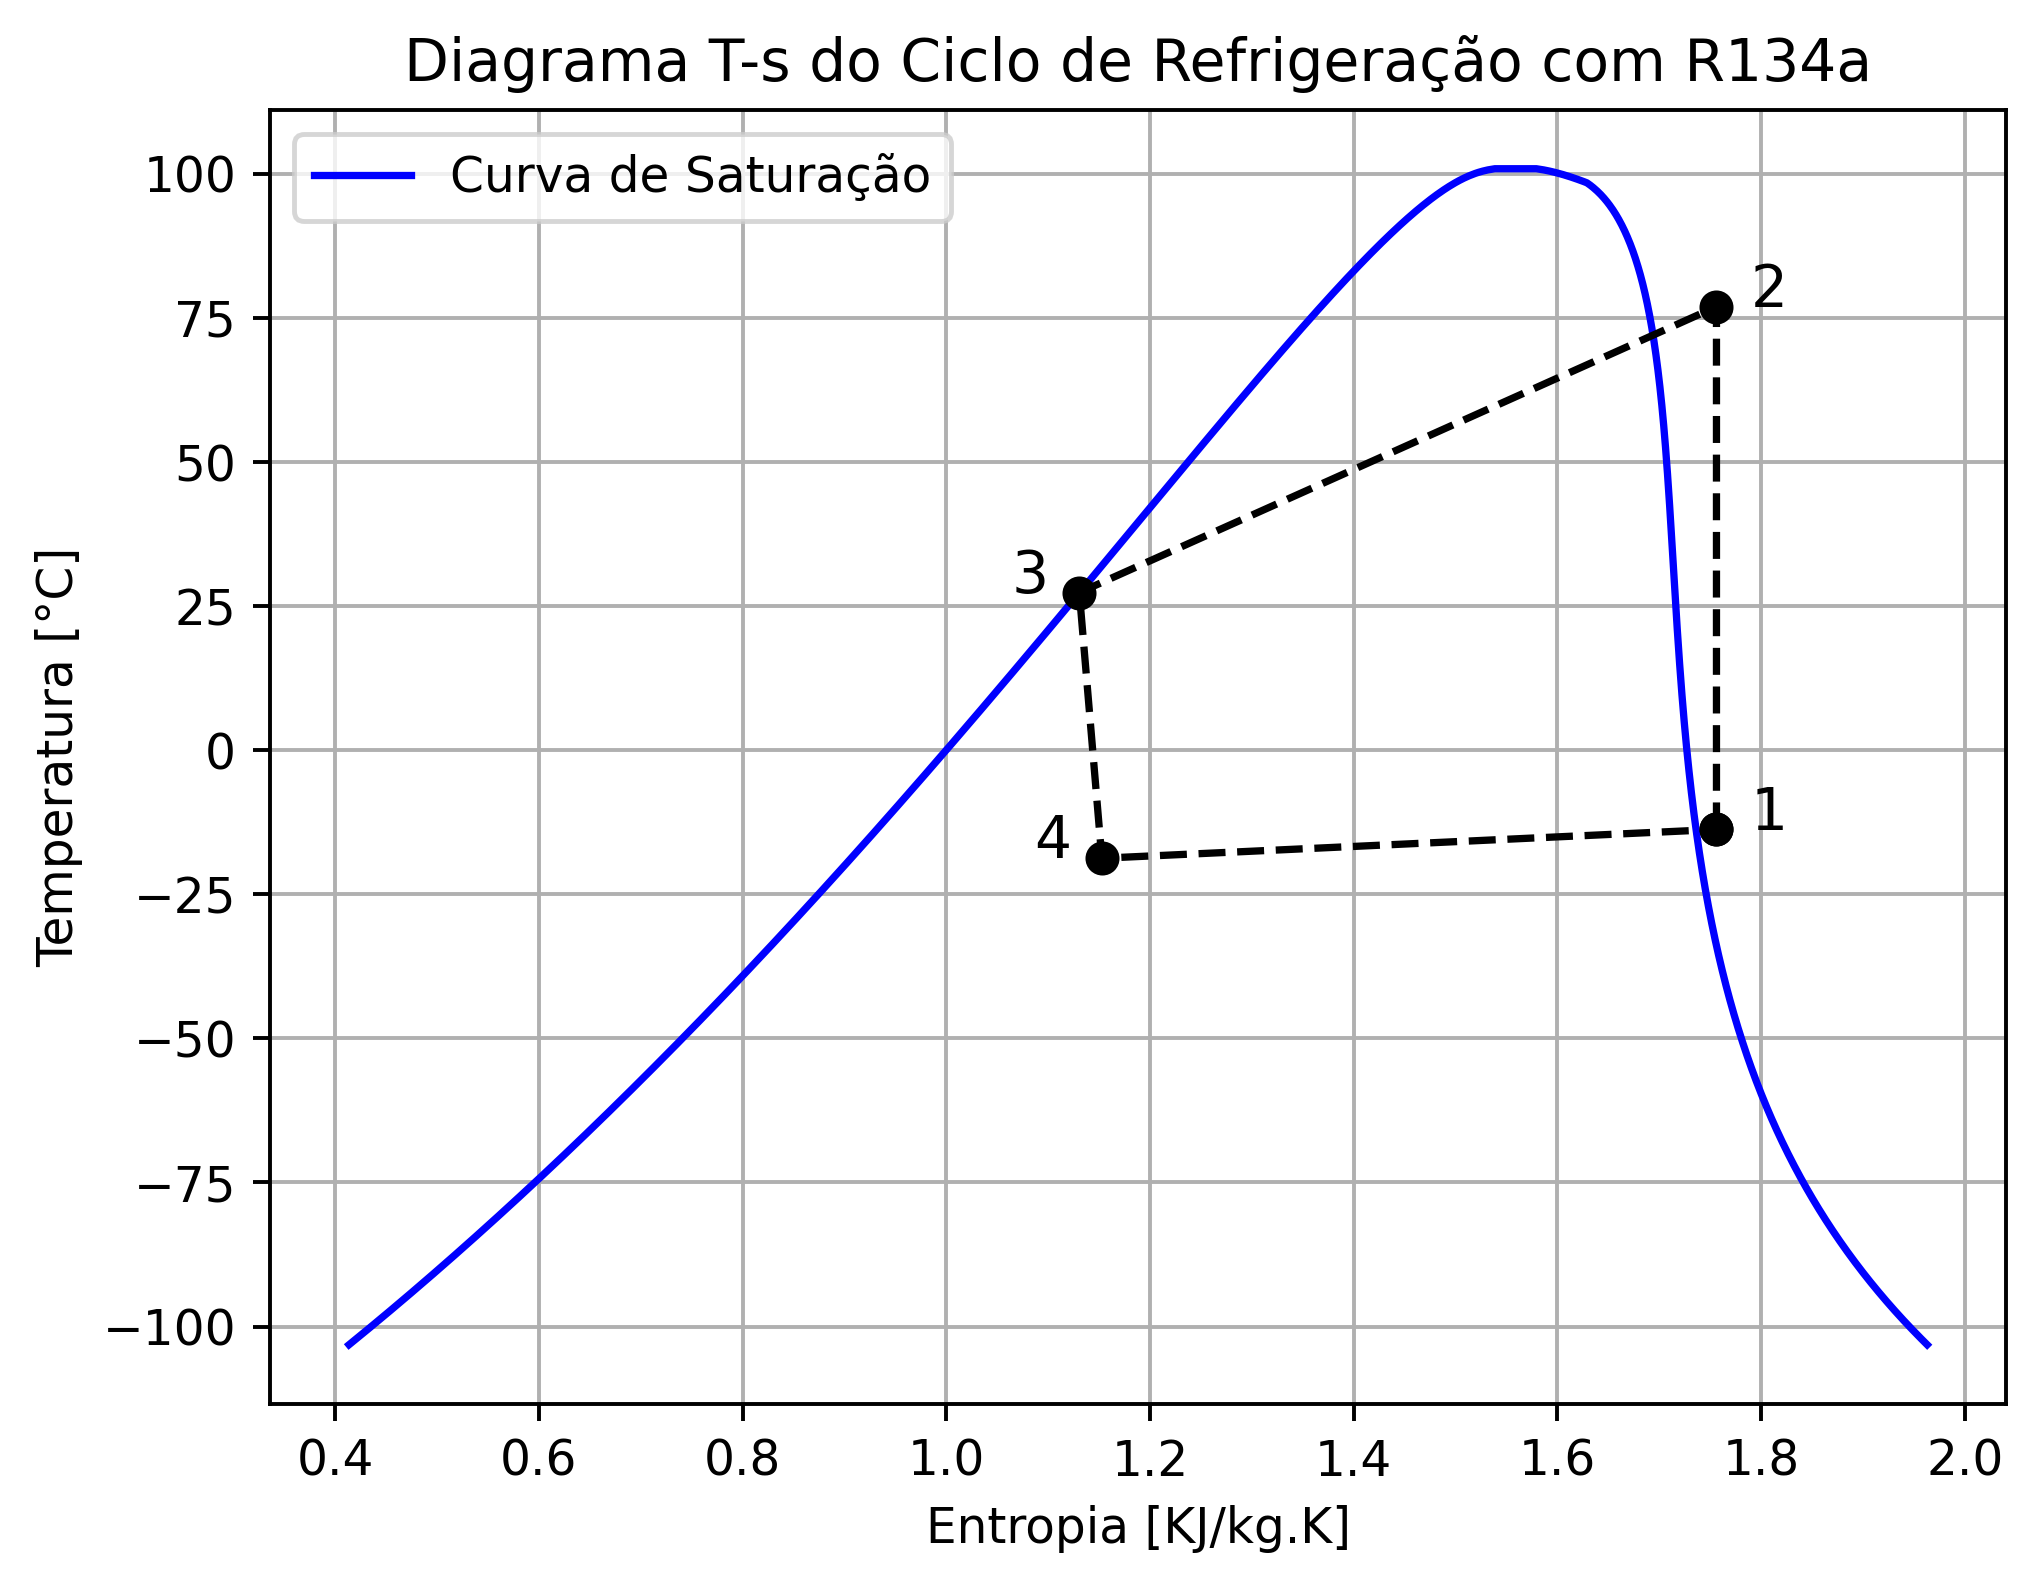

In [337]:
# Definindo os limites de temperatura válidos para o R134a
T_min = 170
T_max = 374

# Criando vetores de temperatura
T_values = np.linspace(T_min, T_max, 1000)

# Calculando as entropias de saturação
s_liq = [CP.PropsSI('S', 'T', T, 'Q', 0, 'R134a') / 1000 for T in T_values]  # Saturação Líquido
s_vap = [CP.PropsSI('S', 'T', T, 'Q', 1, 'R134a') / 1000 for T in T_values]  # Saturação Vapor

# Convertendo temperatura para Celsius
T_values_c = T_values - 273.15

# Criando um vetor de entropia unificado
s_values = np.concatenate((s_liq, s_vap[::-1]))  # Concatena valores de líquido e vapor
T_values_C_combined = np.concatenate((T_values_c, T_values_c[::-1]))  # Concatena temperatura



# Fazendo a plotagem da curva de saturação
plt.figure(dpi=350)
plt.plot(s_values, T_values_C_combined, label='Curva de Saturação', color='blue')

# Plota as linhas entre os pontos do ciclo
plt.plot([s1/1000, s1/1000, s3/1000, s4/1000, s1/1000], 
         [T1, T2, T3, T4, T1], 
         'k--', marker='o', color='black')

# Adicionando enumeração nos pontos do ciclo
plt.text(s1/1000 + 0.07, T1, '1', fontsize=12, ha='right', color='black')
plt.text(s1/1000 + 0.07, T2, '2', fontsize=12, ha='right', color='black')
plt.text(s3/1000 - 0.03, T3, '3', fontsize=12, ha='right', color='black')
plt.text(s4/1000 - 0.03, T4, '4', fontsize=12, ha='right', color='black')


# Configurações do gráfico
plt.title('Diagrama T-s do Ciclo de Refrigeração com R134a')
plt.xlabel('Entropia [KJ/kg.K]')
plt.ylabel('Temperatura [°C]')
plt.grid(True)
plt.legend()
plt.show()
